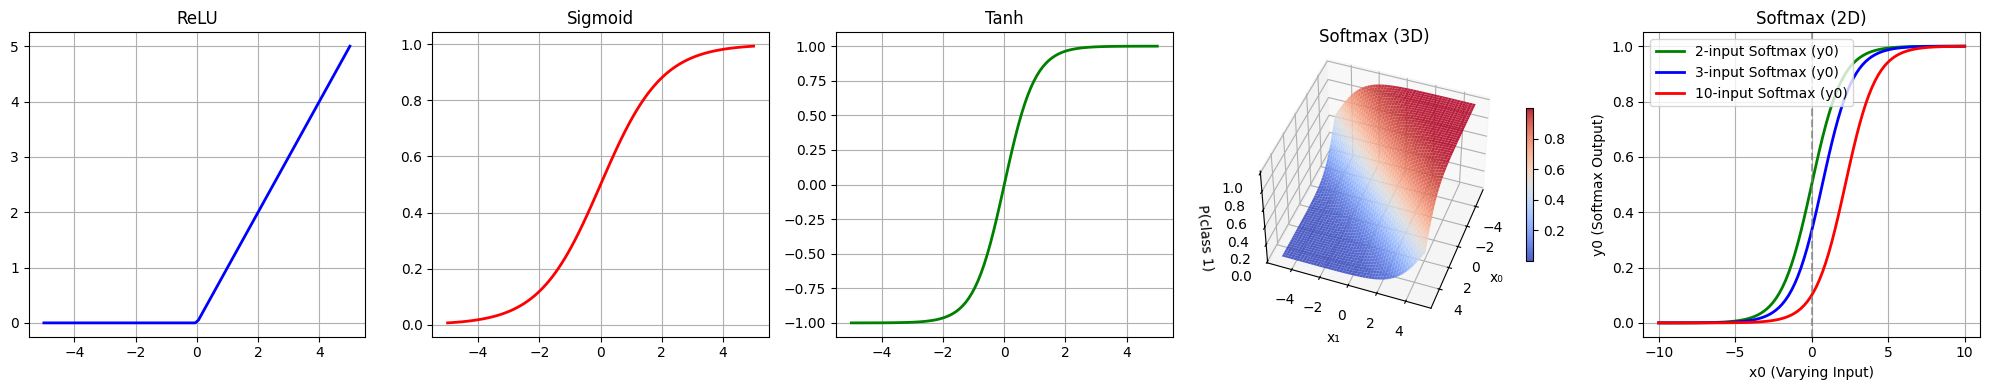

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define input range
x = np.linspace(-5, 5, 100)

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Create subplots
fig = plt.figure(figsize=(20, 4))

# Create regular subplots for first 3 functions
ax1 = plt.subplot(1, 5, 1)
ax2 = plt.subplot(1, 5, 2) 
ax3 = plt.subplot(1, 5, 3)
# 3D subplot for softmax
ax4 = plt.subplot(1, 5, 4, projection='3d')
# 2D subplot for softmax varying inputs
ax5 = plt.subplot(1, 5, 5)

# Plot ReLU
ax1.plot(x, relu(x), 'b-', linewidth=2)
ax1.set_title('ReLU')
ax1.grid(True)

# Plot Sigmoid
ax2.plot(x, sigmoid(x), 'r-', linewidth=2)
ax2.set_title('Sigmoid')
ax2.grid(True)

# Plot Tanh
ax3.plot(x, tanh(x), 'g-', linewidth=2)
ax3.set_title('Tanh')
ax3.grid(True)

# 3D Softmax visualization - 2-class softmax showing P(class 1)
x0_range = np.linspace(-5, 5, 50)
x1_range = np.linspace(-5, 5, 50)
X0, X1 = np.meshgrid(x0_range, x1_range)

# Calculate y1 = P(class 1) = e^{x1} / (e^{x0} + e^{x1})
Y1 = np.exp(X1) / (np.exp(X0) + np.exp(X1))

# Plot single surface with blue-to-red color gradient
surf = ax4.plot_surface(X0, X1, Y1, cmap='coolwarm', alpha=0.9, 
                       linewidth=0, antialiased=True)

ax4.set_xlabel('x₀')
ax4.set_ylabel('x₁') 
ax4.set_zlabel('P(class 1)')
ax4.set_title('Softmax (3D)')
ax4.view_init(elev=45, azim=20)

# Add colorbar
plt.colorbar(surf, ax=ax4, shrink=0.5, aspect=20)

# 2D Softmax with varying number of inputs
x_var = np.linspace(-10, 10, 100)

# 2-input softmax (x0 varies, x1=0)
y0_2input = []
for xi in x_var:
    inputs = np.array([xi, 0])
    outputs = softmax(inputs)
    y0_2input.append(outputs[0])

# 3-input softmax (x0 varies, x1=x2=0)
y0_3input = []
for xi in x_var:
    inputs = np.array([xi, 0, 0])
    outputs = softmax(inputs)
    y0_3input.append(outputs[0])

# 10-input softmax (x0 varies, x1...x9=0)
y0_10input = []
for xi in x_var:
    inputs = np.zeros(10)
    inputs[0] = xi
    outputs = softmax(inputs)
    y0_10input.append(outputs[0])

ax5.plot(x_var, y0_2input, 'g-', linewidth=2, label='2-input Softmax (y0)')
ax5.plot(x_var, y0_3input, 'b-', linewidth=2, label='3-input Softmax (y0)')
ax5.plot(x_var, y0_10input, 'r-', linewidth=2, label='10-input Softmax (y0)')
ax5.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
ax5.set_xlabel('x0 (Varying Input)')
ax5.set_ylabel('y0 (Softmax Output)')
ax5.set_title('Softmax (2D)')
ax5.legend()
ax5.grid(True)

plt.tight_layout()
plt.show()
